In [24]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# check Torch version
torch.__version__

'2.2.2'

#### Create device-agnostic code

+ If have access to a GPU, code to use it
+ If no GPU, to default to CPU

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cpu


#### Data

In [5]:
## Create *known* parameters

weight = 0.7
bias=0.3

start = 0 
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [6]:
len(X), len(y)

(100, 100)

#### Split Data into Training and Test Sets

In [7]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [8]:
def plot_predictions(train_data = X_train, train_labels = y_train,
                    test_data = X_test, test_labels=y_test, predictions=None):
    """Plots training data, test data; and compares predictions"""
    plt.figure(figsize=(10,6))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')

    # Plot testing data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Training Data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4,label='Predictions')

    plt.legend(prop={'size':14})

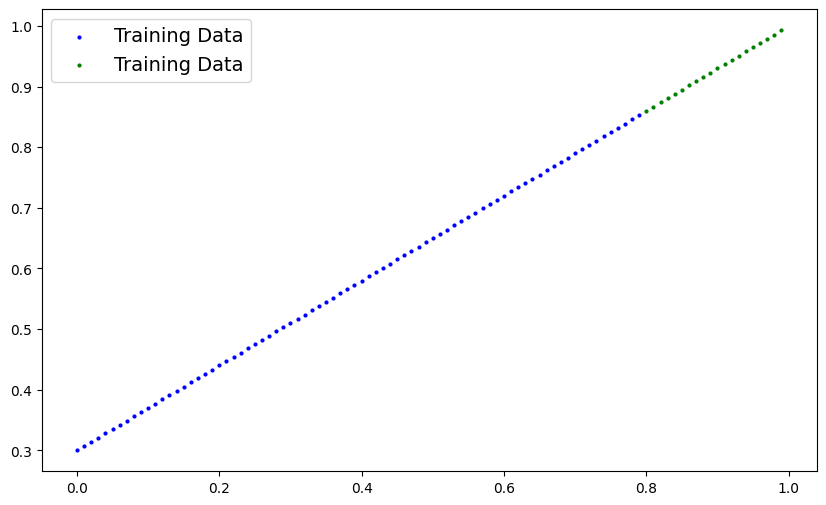

In [9]:
plot_predictions()

#### Creating Regression Model with pyTorch

In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

#### Create Model

In [11]:
torch.manual_seed(34)
model_1 = LinearRegressionModel()
list(model_1.parameters())

[Parameter containing:
 tensor([1.4219], requires_grad=True),
 Parameter containing:
 tensor([-0.2314], requires_grad=True)]

#### Make Predictions

In [13]:
with torch.inference_mode():
    y_preds = model_1(X_test)
#y_preds

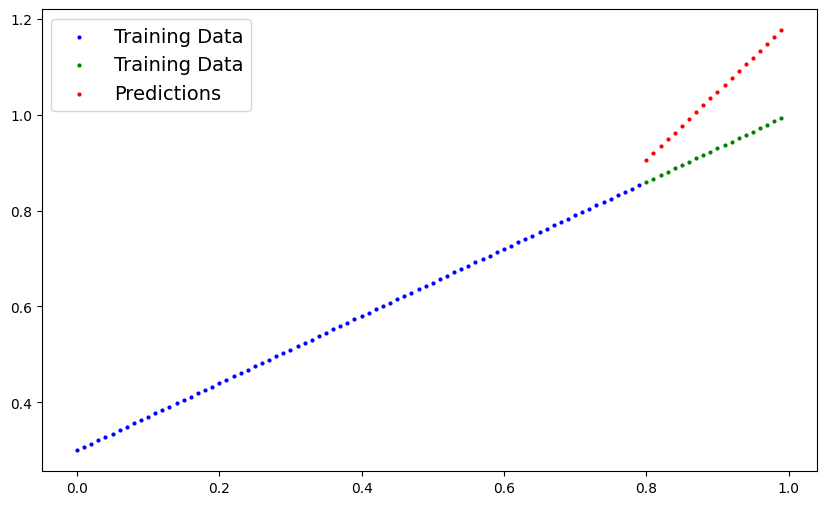

In [14]:
plot_predictions(predictions=y_preds)

#### Train Model

In [15]:
model_1.state_dict()

OrderedDict([('weights', tensor([1.4219])), ('bias', tensor([-0.2314]))])

In [20]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.05)

#### Training Loops

In [22]:
epochs = 100

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epocj: {epoch} | Loss : {loss} | Test loss: {test_loss}")

        print(model_1.state_dict())

Loss: 0.24940557777881622
Epocj: 0 | Loss : 0.24940557777881622 | Test loss: 0.16972696781158447
OrderedDict([('weights', tensor([1.4359])), ('bias', tensor([-0.1889]))])
Loss: 0.21394169330596924
Loss: 0.19252356886863708
Loss: 0.17881625890731812
Loss: 0.169727623462677
Loss: 0.16339585185050964
Loss: 0.15891484916210175
Loss: 0.15548542141914368
Loss: 0.15256914496421814
Loss: 0.1500556766986847
Loss: 0.14783598482608795
Loss: 0.14580261707305908
Loss: 0.14393356442451477
Loss: 0.14206451177597046
Loss: 0.14026162028312683
Loss: 0.1385054886341095
Loss: 0.13674938678741455
Loss: 0.135005384683609
Loss: 0.13329185545444489
Loss: 0.13157834112644196
Loss: 0.12986478209495544
Loss: 0.12815125286579132
Loss: 0.126437708735466
Loss: 0.12472418695688248
Loss: 0.12301063537597656
Loss: 0.12129709869623184
Loss: 0.11958356201648712
Loss: 0.117870032787323
Loss: 0.11615650355815887
Loss: 0.11444296687841415
Loss: 0.11272941529750824
Loss: 0.11101589351892471
Loss: 0.10930235683917999
Loss: 0

In [27]:
with torch.inference_mode():
    y_preds_new = model_1(X_test)

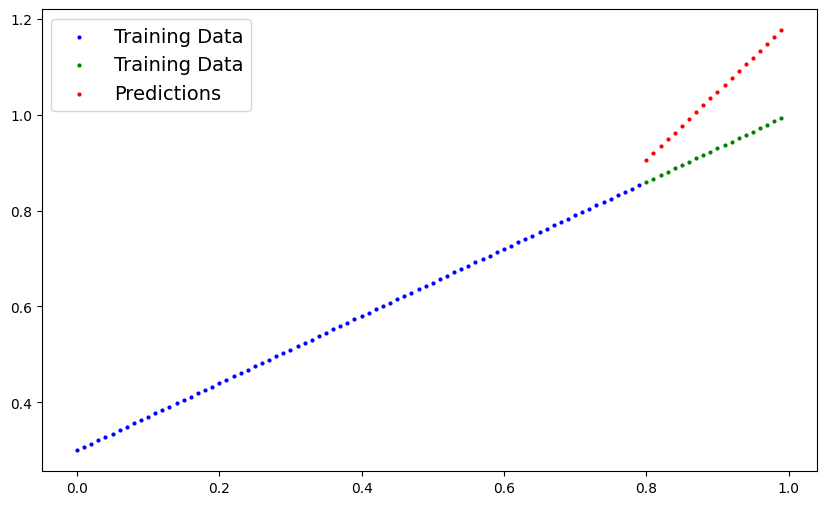

In [26]:
plot_predictions(predictions=y_preds)

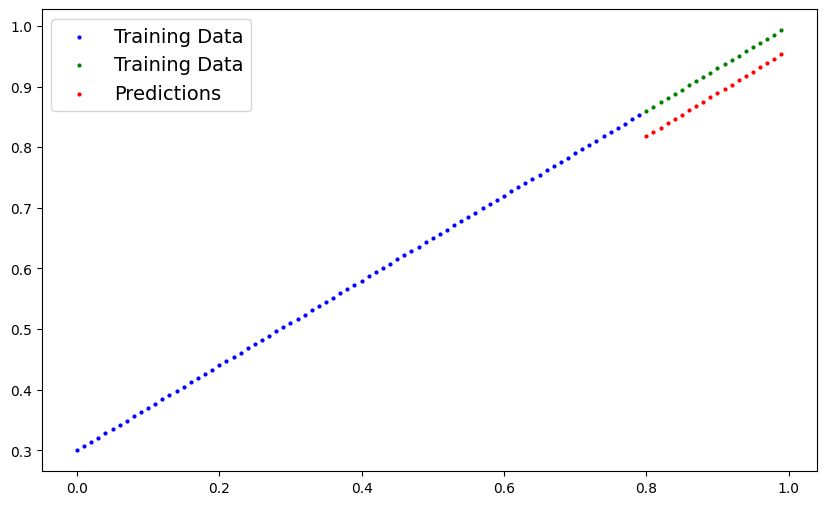

In [28]:
plot_predictions(predictions=y_preds_new)

#### Saving Model

In [30]:
# saving pyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


#### Loading Model

In [31]:
loaded_model_1 = LinearRegressionModel()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [32]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_1(X_test)
loaded_model_preds

tensor([[0.8183],
        [0.8254],
        [0.8325],
        [0.8396],
        [0.8467],
        [0.8538],
        [0.8609],
        [0.8680],
        [0.8750],
        [0.8821],
        [0.8892],
        [0.8963],
        [0.9034],
        [0.9105],
        [0.9176],
        [0.9247],
        [0.9318],
        [0.9389],
        [0.9460],
        [0.9530]])

In [34]:
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])